#Neural Network & Deep learning | Project 2

###The Real Problem

Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street level photographs is Google’s Street View imagery comprised of hundreds of millions of geo-located 360 degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents.

More broadly, recognizing numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colors, styles, orientations, and character arrangements. The recognition problem is further complicated by environmental factors such as lighting, shadows, specularities, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs.

In this project we will use dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

The Street View House Numbers (SVHN) Dataset SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with minimal requirement on data formatting but comes from a significantly harder, unsolved, real world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

Link to the dataset:

https://drive.google.com/file/d/1L2-WXzguhUsCArrFUc8EEkXcj33pahoS/view?usp=sharing

- Acknowledgement for the datasets.

Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng

Reading Digits in Natural Images with Unsupervised Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF

http://ufldl.stanford.edu/housenumbers as the URL for this site when necessary

#### The objective of the project is to learn how to implement a simple image classification pipeline based on a deep neural network. The goals of this project are as follows: 
- Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages) 
- Data fetching and understand the train/val/test splits. (5 points)
- Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations) (10 points) 
- Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) (10 points) 
- Implement batch normalization for training the neural network (5 points) 
- Print the classification accuracy metrics (5 points) 


#Data fetching and understand the train/val/test splits

In [0]:
#pip install tensorflow-gpu

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(42)
print(tf.__version__)

2.1.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
filepath = '/content/drive/My Drive/Great_Lakes_Assignments/09_Neural_Network_Deep_Learning_R6_Project2/SVHN_single_grey1.h5'
import pandas as pd
import numpy as np
import h5py
svhn_data = h5py.File(filepath,'r')
print("File read successfully")

File read successfully


In [5]:
list(svhn_data.keys())

[u'X_test', u'X_train', u'X_val', u'y_test', u'y_train', u'y_val']

In [6]:
X_test = np.array(svhn_data['X_test'])
X_test.shape

(18000, 32, 32)

In [7]:
X_train = np.array(svhn_data['X_train'])
X_train.shape

(42000, 32, 32)

In [8]:
X_val = np.array(svhn_data['X_val'])
X_val.shape

(60000, 32, 32)

In [9]:
y_test = np.array(svhn_data['y_test'])
y_test.shape

(18000,)

In [10]:
y_train = np.array(svhn_data['y_train'])
y_train.shape

(42000,)

In [11]:
y_val = np.array(svhn_data['y_val'])
y_val.shape

(60000,)

In [0]:
import matplotlib.pyplot as plt

Dimensions of an Image:  (32, 32)


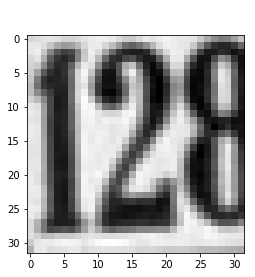

In [13]:
print "Dimensions of an Image: ", X_train.shape[1:3]
plt.figure()
plt.imshow(X_train[0],cmap=plt.cm.binary)
plt.suptitle(str(y_train[0]), color = "white")
plt.grid(False)
plt.show()

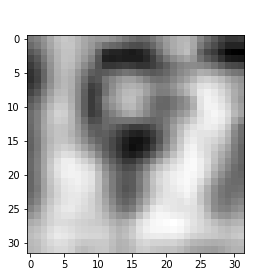

Dimensions of an Image:  (32, 32)


In [14]:
image = np.random.randint(0,X_train.shape[0])
plt.imshow(X_train[image],cmap='gray')
plt.suptitle(str(y_train[image]), color = "white")
plt.show()
print "Dimensions of an Image: ", X_train.shape[1:3]

In [15]:
print "No. of sample in X_train: " , X_train.shape[0]
print "No. of sample in X_test: " , X_test.shape[0]

No. of sample in X_train:  42000
No. of sample in X_test:  18000


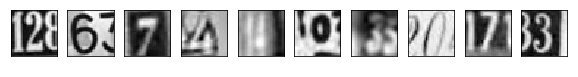

In [16]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='gray')
    plt.xlabel(str(y_train[i]),color = 'white')
plt.show()

####Implement and apply a deep neural network classifier including (feedforward neural network, RELU, activations) (10 points)

####Reshape the 3D array to 2D array data

In [17]:
# Reshape data from 2D to 1D -> 32x32 to 1024
X_train_RS = X_train.reshape(42000, 1024)
X_test_RS = X_test.reshape(18000, 1024)
X_val_RS = X_val.reshape(60000, 1024)
print(X_train_RS.shape)
print(X_test_RS.shape)
print(X_val_RS.shape)

(42000, 1024)
(18000, 1024)
(60000, 1024)


####Normalise Data

In [18]:
from sklearn.preprocessing import Normalizer
transformer = Normalizer()
X_train_Nor = transformer.fit_transform(X_train_RS)
X_test_Nor = transformer.transform(X_test_RS)
X_val_Nor = transformer.transform(X_val_RS)
print('Normalization Done')

Normalization Done


### Convert train, test & val labels to one hot vectors. There are total 10 classes from 0 to 9

In [19]:
y_train_OH = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_OH = tf.keras.utils.to_categorical(y_test, num_classes=10)
y_val_OH = tf.keras.utils.to_categorical(y_val, num_classes=10)
print(y_train_OH.shape)
print(y_test_OH.shape)
print(y_val_OH.shape)

(42000, 10)
(18000, 10)
(60000, 10)


In [0]:
# Import the necessary layers from keras to build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

# Initialize Sequential model
model = Sequential()

In [0]:
#Dense 1st layer
model.add(Dense(200, activation='relu'))

#Dense 2nd layer
model.add(Dense(100, activation='relu'))

#Dense 3rd layer
model.add(Dense(50, activation='relu'))

#Dense 4th layer
model.add(Dense(25, activation='relu'))

In [0]:
#Output layer
model.add(Dense(10, activation='softmax'))

####Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent, cross entropy loss, cost functions) (10 points)

In [0]:
#Compile the model
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('model.h5',save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

In [34]:
#Train the model
model.fit(X_train_Nor, y_train_OH, validation_data=(X_val_Nor,y_val_OH), epochs=50, batch_size=32, callbacks=[model_checkpoint])

Train on 42000 samples, validate on 60000 samples
Epoch 1/50
41632/42000 [============================>.] - ETA: 0s - loss: 0.8491 - accuracy: 0.7320
Epoch 00001: val_accuracy improved from -inf to 0.69935, saving model to model.h5
42000/42000 [==============================] - 8s 190us/sample - loss: 0.8493 - accuracy: 0.7321 - val_loss: 0.9244 - val_accuracy: 0.6993
Epoch 2/50
41728/42000 [============================>.] - ETA: 0s - loss: 0.8380 - accuracy: 0.7374
Epoch 00002: val_accuracy improved from 0.69935 to 0.72232, saving model to model.h5
42000/42000 [==============================] - 7s 178us/sample - loss: 0.8392 - accuracy: 0.7371 - val_loss: 0.8959 - val_accuracy: 0.7223
Epoch 3/50
41568/42000 [============================>.] - ETA: 0s - loss: 0.8334 - accuracy: 0.7370
Epoch 00003: val_accuracy improved from 0.72232 to 0.75163, saving model to model.h5
42000/42000 [==============================] - 8s 183us/sample - loss: 0.8345 - accuracy: 0.7367 - val_loss: 0.8030 - va

In [35]:
#Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  205000    
_________________________________________________________________
dense_1 (Dense)              multiple                  20100     
_________________________________________________________________
dense_2 (Dense)              multiple                  5050      
_________________________________________________________________
dense_3 (Dense)              multiple                  1275      
_________________________________________________________________
dense_4 (Dense)              multiple                  260       
Total params: 231,685
Trainable params: 231,685
Non-trainable params: 0
_________________________________________________________________


In [47]:
test_loss, test_acc = model.evaluate(X_test_Nor,  y_test_OH, verbose=2)

print 'Test accuracy:-', str(test_acc*100) + "%"

18000/18000 - 1s - loss: 0.7327 - accuracy: 0.7780
Test accuracy:- 77.7999997138977%


In [72]:
print "Final Train Accuracy from model history: ", str(model.history.history['accuracy'][-1]*100) + "%"
print "Final Validation Accuracy from model history: ", str(model.history.history['val_accuracy'][-1]*100) + "%"

Final Train Accuracy from model history:  81.53571486473083%
Final Validation Accuracy from model history:  80.03833293914795%


['loss', 'val_accuracy', 'val_loss', 'accuracy']


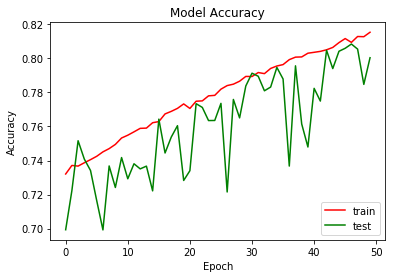

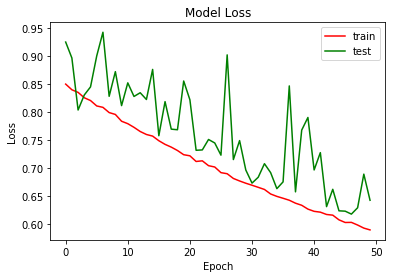

In [74]:
import matplotlib.pyplot as plt

# list all data in history
print(model.history.history.keys())

# Summary - History for accuracy
plt.plot(model.history.history['accuracy'], color = 'red')
plt.plot(model.history.history['val_accuracy'], color = 'green')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# Summary - History for loss

plt.plot(model.history.history['loss'], color = 'red')
plt.plot(model.history.history['val_loss'], color = 'green')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show();

####Implement batch normalization for training the neural network (5 points)

#####Now we will reshape and normalise the data within the model, for which we will add reshape and batchnormalisation layers.

In [0]:
#Clear out tensorflow memory
tf.keras.backend.clear_session()

# Initialize Sequential model
model1 = Sequential()

# Reshape data from 2D to 1D -> 32x32 to 1024
model1.add(Reshape((1024,),input_shape=(32,32,)))

# Normalize the data
model1.add(BatchNormalization())

In [0]:
#Dense 1st layer
model1.add(Dense(200, activation='relu'))
model1.add(BatchNormalization())
#Dense 2nd layer
model1.add(Dense(100, activation='relu'))
model1.add(BatchNormalization())
#Dense 3rd layer
model1.add(Dense(50, activation='relu'))
model1.add(BatchNormalization())
#Dense 4th layer
model1.add(Dense(25, activation='relu'))
model1.add(BatchNormalization())

In [0]:
#Output layer
model1.add(Dense(10, activation='softmax'))

In [0]:
#Compile the model
model1.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
#Saving the best model using model checkpoint callback
model1_checkpoint=tf.keras.callbacks.ModelCheckpoint('model1.h5',save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

In [62]:
#Train the model
model1.fit(X_train,y_train_OH, validation_data=(X_val,y_val_OH), epochs=50, batch_size=32, callbacks = [model1_checkpoint])

Train on 42000 samples, validate on 60000 samples
Epoch 1/50
41984/42000 [============================>.] - ETA: 0s - loss: 1.7796 - accuracy: 0.3977
Epoch 00001: val_accuracy improved from -inf to 0.60140, saving model to model1.h5
42000/42000 [==============================] - 12s 295us/sample - loss: 1.7794 - accuracy: 0.3978 - val_loss: 1.2743 - val_accuracy: 0.6014
Epoch 2/50
41984/42000 [============================>.] - ETA: 0s - loss: 1.2872 - accuracy: 0.5848
Epoch 00002: val_accuracy improved from 0.60140 to 0.68103, saving model to model1.h5
42000/42000 [==============================] - 12s 277us/sample - loss: 1.2872 - accuracy: 0.5849 - val_loss: 1.0269 - val_accuracy: 0.6810
Epoch 3/50
41888/42000 [============================>.] - ETA: 0s - loss: 1.1390 - accuracy: 0.6354
Epoch 00003: val_accuracy improved from 0.68103 to 0.70623, saving model to model1.h5
42000/42000 [==============================] - 11s 272us/sample - loss: 1.1392 - accuracy: 0.6353 - val_loss: 0.935

In [63]:
#Model Summary
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 200)               205000    
_________________________________________________________________
batch_normalization_1 (Batch (None, 200)               800       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5

In [64]:
test_loss, test_acc = model1.evaluate(X_test,  y_test_OH, verbose=2)

print 'Test accuracy:-', str(test_acc*100) + "%"

18000/18000 - 2s - loss: 0.5167 - accuracy: 0.8473
Test accuracy:- 84.72777605056763%


In [73]:
print "Final Train Accuracy from model history: ", str(model1.history.history['accuracy'][-1]*100) + "%"
print "Final Validation Accuracy from model history: ", str(model1.history.history['val_accuracy'][-1]*100) + "%"

Final Train Accuracy from model history:  84.28809642791748%
Final Validation Accuracy from model history:  89.86833095550537%


['loss', 'val_accuracy', 'val_loss', 'accuracy']


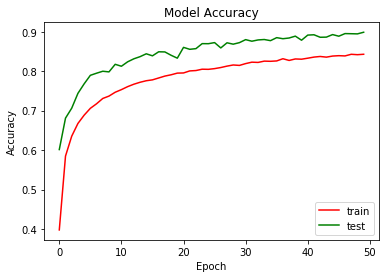

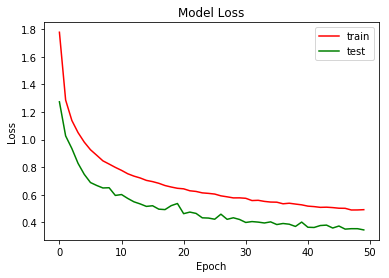

In [68]:
import matplotlib.pyplot as plt

# list all data in history
print(model1.history.history.keys())

# Summary - History for accuracy
plt.plot(model1.history.history['accuracy'], color = 'red')
plt.plot(model1.history.history['val_accuracy'], color = 'green')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

# Summary - History for loss

plt.plot(model1.history.history['loss'], color = 'red')
plt.plot(model1.history.history['val_loss'], color = 'green')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show();

#### We can see that there is increase in test and validation accuracy of the model by adding batch normalisation layers to the model.

####Print the classification accuracy metrics (5 points) 

In [0]:
# make predictions for the testing set
y_pred = model1.predict(X_test)

In [0]:
from sklearn import metrics

In [79]:
# Accuracy score for predictions.
print "Accuracy score for predictions: ", str(metrics.accuracy_score(y_test_OH, y_pred.round())*100) + "%"

Accuracy score for predictions:  80.93333333333334%


In [83]:
print ("Confusion Matrix for predictions")
pd.DataFrame(metrics.confusion_matrix(y_test_OH.argmax(axis=1), y_pred.argmax(axis=1)),
                 columns=['0','1','2','3','4','5','6','7','8','9'], index=['0','1','2','3','4','5','6','7','8','9'])

Confusion Matrix for predictions


,0,1,2,3,4,5,6,7,8,9
0,1630,39,7,18,21,6,30,15,19,29
1,27,1599,18,25,45,21,17,51,12,13
2,21,37,1540,34,25,12,10,54,29,41
3,17,44,35,1339,17,145,20,39,39,24
4,25,52,26,15,1591,11,36,15,17,24
5,18,18,14,76,11,1495,61,9,40,26
6,44,24,15,19,27,74,1532,13,67,17
7,21,69,33,25,16,11,10,1597,10,16
8,38,44,20,47,24,48,99,11,1431,50
9,66,37,20,43,11,51,16,26,37,1497


In [85]:
from sklearn.metrics import classification_report
print ("Classification Report")
print(classification_report(y_test_OH, y_pred.round()))

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1814
           1       0.88      0.84      0.86      1828
           2       0.93      0.83      0.88      1803
           3       0.89      0.74      0.81      1719
           4       0.94      0.84      0.89      1812
           5       0.87      0.81      0.84      1768
           6       0.89      0.80      0.85      1832
           7       0.91      0.86      0.88      1808
           8       0.91      0.74      0.82      1812
           9       0.91      0.78      0.84      1804

   micro avg       0.91      0.81      0.85     18000
   macro avg       0.91      0.81      0.85     18000
weighted avg       0.91      0.81      0.85     18000
 samples avg       0.81      0.81      0.81     18000

